In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

In [3]:
def paramDis_pnorm(s, sre, p):
    maps = lambda k : s[k] if k in s else 0.0
    mapfs = lambda k : sre[k] if k in sre else 0.0
    allKeys = set(s.keys()).union(sre.keys())
    ans = 0.0
    idea = 0.0
    for k in allKeys:
        ans += abs(maps(k) - mapfs(k))**p
        idea += abs(maps(k))**p
    return ans / idea


def getAllError_calls(filename):
    with open(filename) as f:
        data = json.load(f)
    originalHam = data[0]
#     print(originalHam)
    calls = [data[i][1] + data[i][2] for i in range(1, len(data))]
    errors = [ paramDis_pnorm(originalHam, data[i][0], 1) for i in range(1, len(data))]
    return errors, calls

def getAllError_calls_multiH(filename):
    calls = []
    errors = []
    with open(filename) as f:
        data = json.load(f)
    for case in data:
        if type(case) == dict:
            originalHam = case
        else :
            calls.append(case[1] + case[2])
            errors.append(paramDis_pnorm(originalHam, case[0], 1))
    return errors, calls                      

In [4]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('different settings')

## violin plot specification

- red dot: median
- vertical line: mean
- black bar: 25% - 75%

in calculating parameter distance, 1-norm gives more detail

## scaling, strictly Ising, with randomly generated parameters n=1:7

In [5]:
nmax = 8
filenames = ["../data/strictlyRandomIsingRounds=500_n=" + str(x) + ".json" for x in range(1, nmax)]
maxPoint = 500
titles = [ "n=" + str(x) for x in range(1, nmax)]

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(e[0:maxPoint])
    calls.append(c[0:maxPoint])

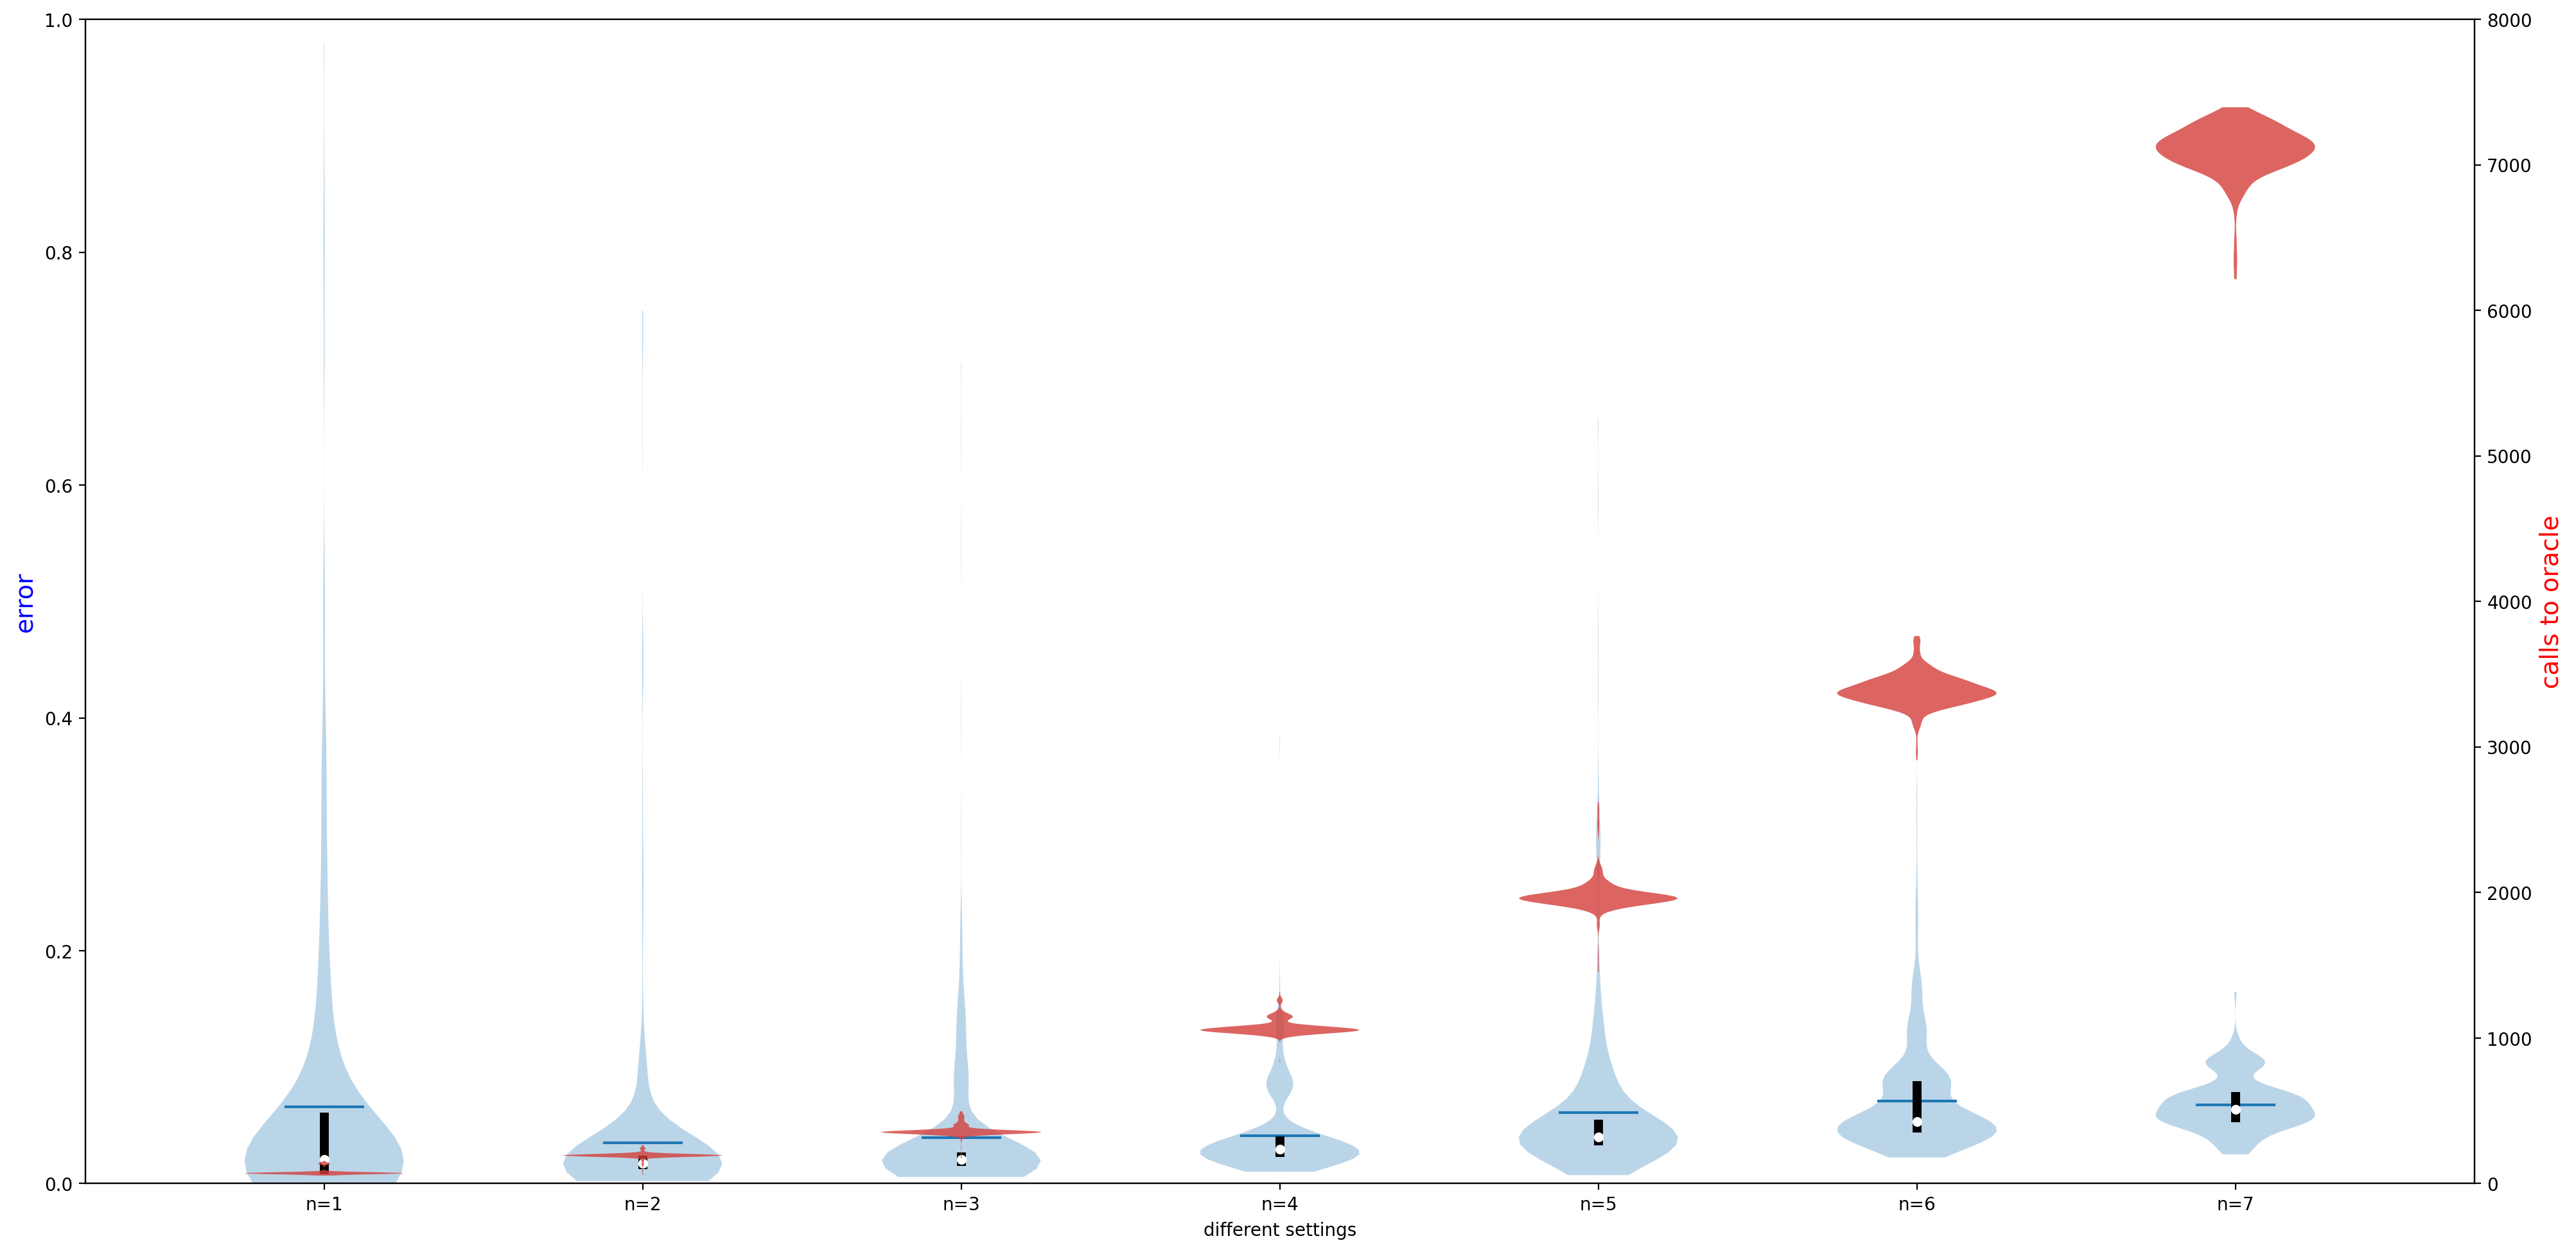

In [6]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(24, 12), sharey=True, dpi=200)
set_axis_style(ax1, titles)
quartile1, medians, quartile3= [], [], []
for e in errors:
    q1, m, q3 = np.percentile(e, [25, 50, 75], axis=0)
#     print(q1, m, q3)
    quartile1.append(q1)
    medians.append(m)
    quartile3.append(q3)

# print(quartile1, quartile3, medians)
ax1.violinplot(errors, showmeans=True, showmedians=False,
        showextrema=False)
inds = np.arange(1, len(medians) + 1)
ax1.set_ylabel("error", color="blue", size=14)
ax1.scatter(inds, medians, marker='o', color='white', s=20, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)

ax2 = ax1.twinx()
ax2.set_ylabel("calls to oracle", color="red",fontsize=14)
# ax2.scatter([1, 2], [1000, 1500], color="red")
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
parts = ax2.violinplot(calls, showmeans=False, showmedians=False,
        showextrema=False)
ax2.set_ylim([0, 8000])
ax1.set_ylim([0, 1.0])
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
#     pc.set_edgecolor('black')
    pc.set_alpha(0.8)
plt.savefig("strictRandomIsing_n=1-7_violin.svg", format="svg")
plt.show()

## scaling, strictly Ising, with fixed parameters, n=1:8

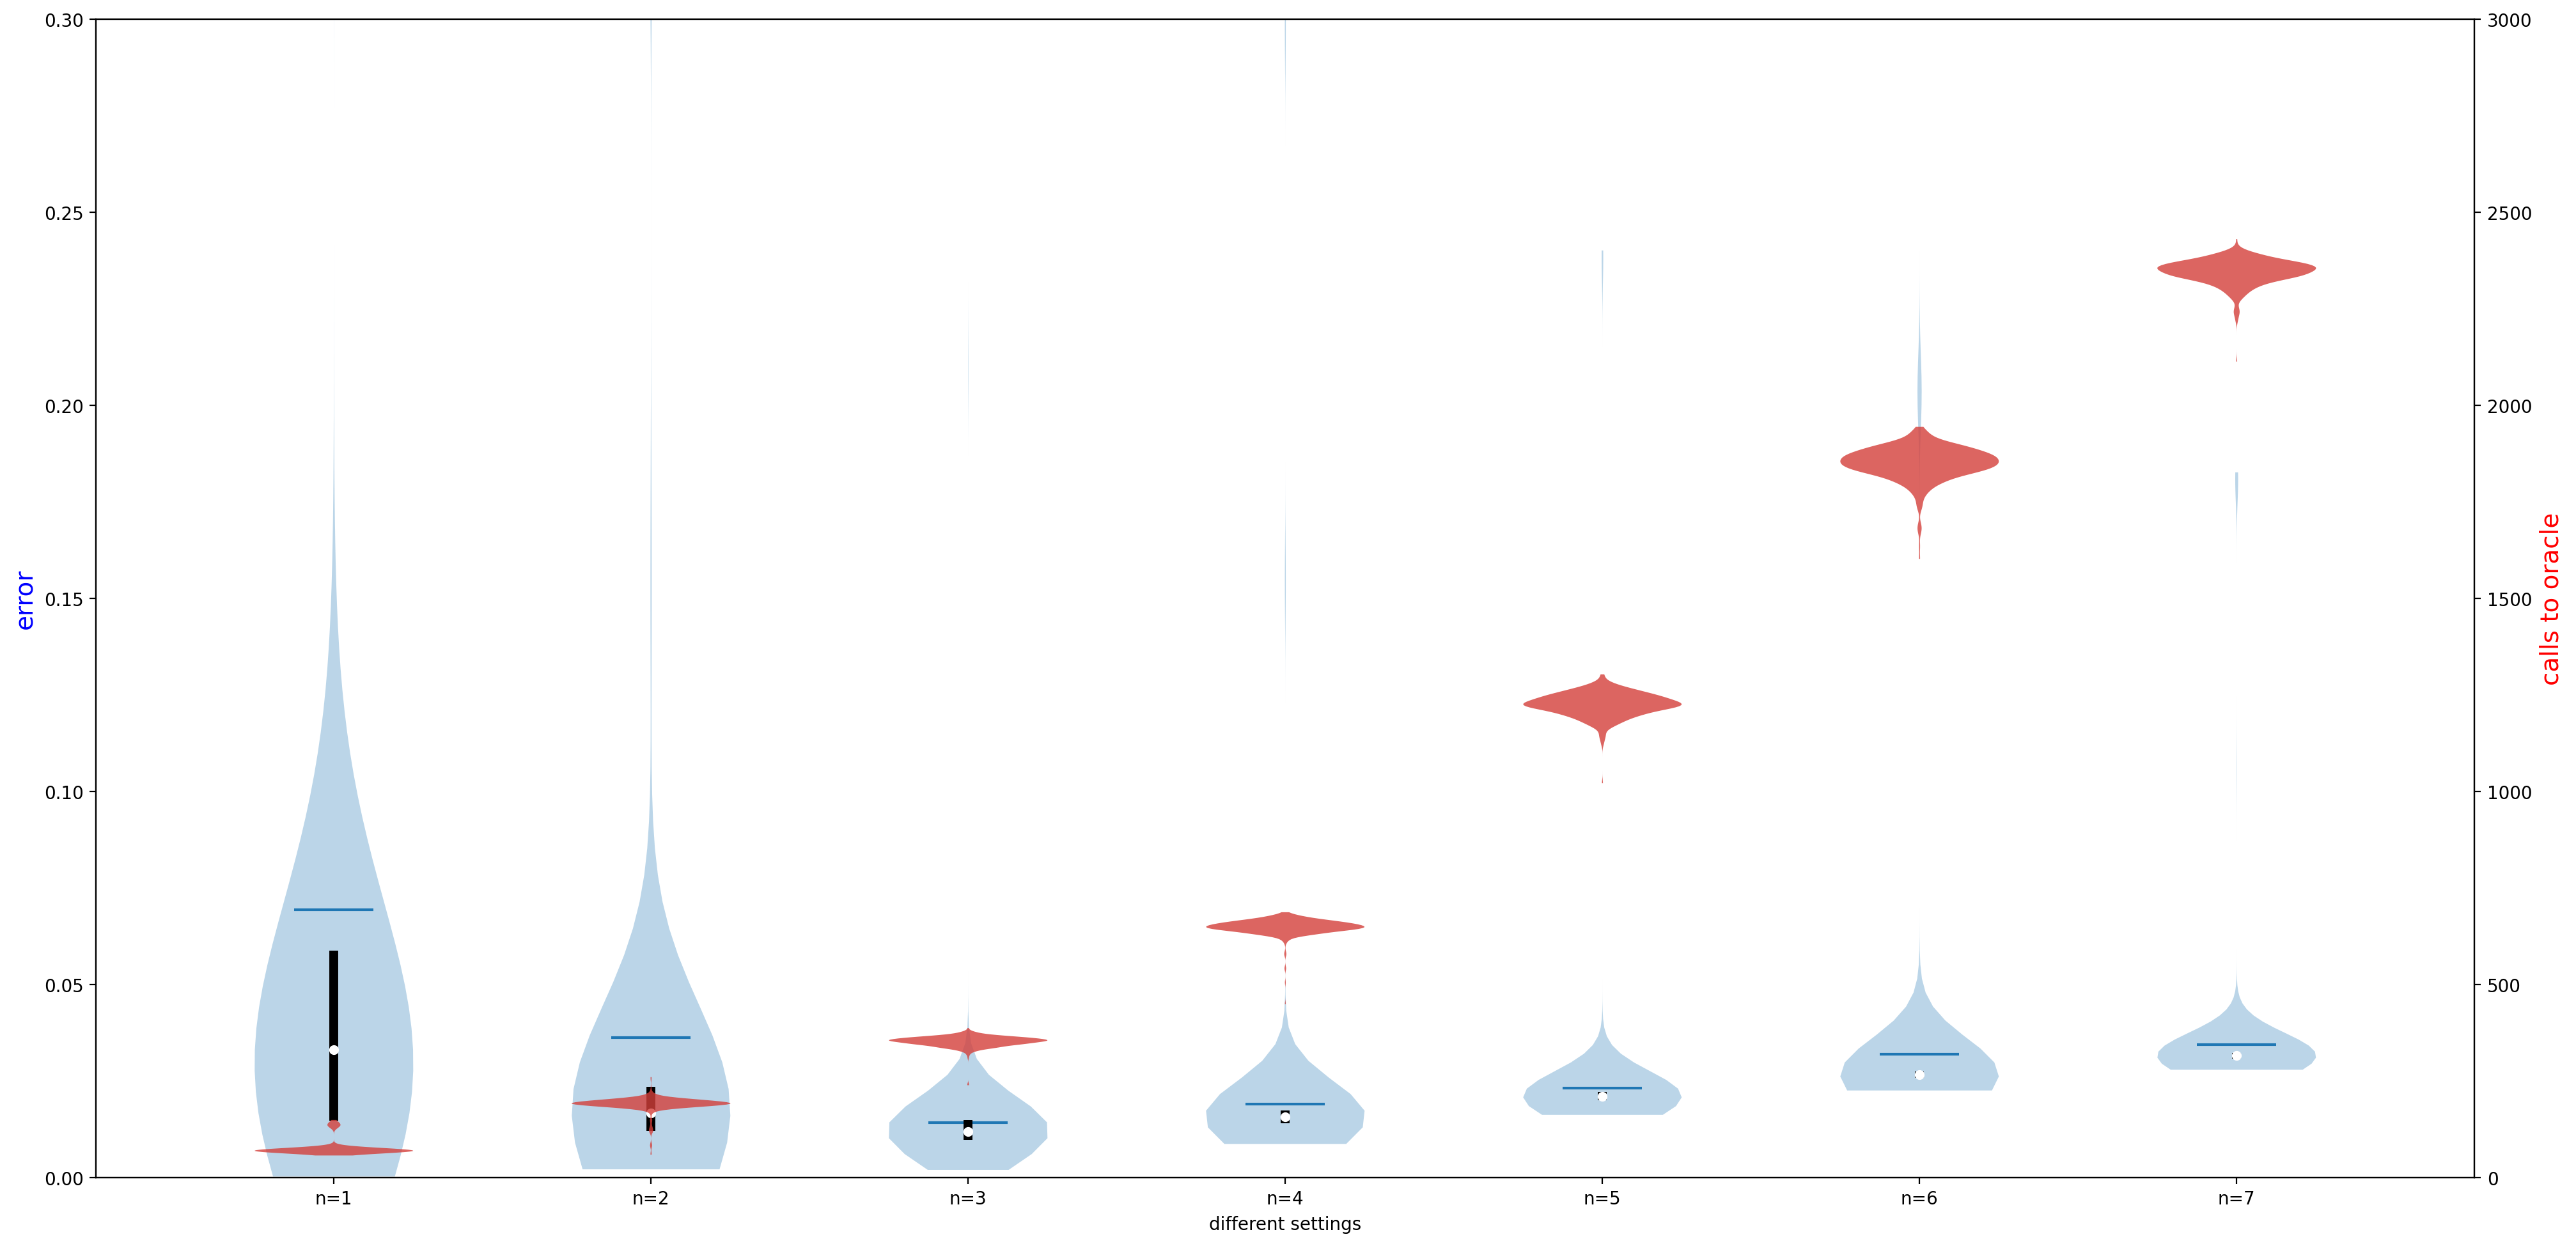

In [7]:
nmax = 8
filenames = ["../data/strictlyIsing/strictlyIsingRounds=500_n=" + str(x) + ".json" for x in range(1, nmax)]
maxPoint = 500
titles = [ "n=" + str(x) for x in range(1, nmax)]

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(e[0:maxPoint])
    calls.append(c[0:maxPoint])
    
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(24, 12), sharey=True, dpi=200)
set_axis_style(ax1, titles)
quartile1, medians, quartile3= [], [], []
for e in errors:
    q1, m, q3 = np.percentile(e, [25, 50, 75], axis=0)
#     print(q1, m, q3)
    quartile1.append(q1)
    medians.append(m)
    quartile3.append(q3)

# print(quartile1, quartile3, medians)
ax1.violinplot(errors, showmeans=True, showmedians=False,
        showextrema=False)
inds = np.arange(1, len(medians) + 1)
ax1.set_ylabel("error", color="blue", size=14)
ax1.scatter(inds, medians, marker='o', color='white', s=20, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)

ax2 = ax1.twinx()
ax2.set_ylabel("calls to oracle", color="red",fontsize=14)
# ax2.scatter([1, 2], [1000, 1500], color="red")
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
parts = ax2.violinplot(calls, showmeans=False, showmedians=False,
        showextrema=False)
ax2.set_ylim([0, 3000])
ax1.set_ylim([0, 0.3])
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
#     pc.set_edgecolor('black')
    pc.set_alpha(0.8)
plt.savefig("strictIsing_n=1-8_violin.svg", format="svg")
plt.show()

## Random Ising, under various noise level, with n=4

In [49]:
noiseLevels = ["0.0001",
               "0.001",
               "0.003",
               "0.006",
               "0.01"]
#                "0.015"
#               ]
filenames = ["../data/RandomIsingRounds=500_noise=" + x + ".json" for x in noiseLevels]
titles = [ "noise=" + x for x in noiseLevels]

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(e)
    calls.append(c)

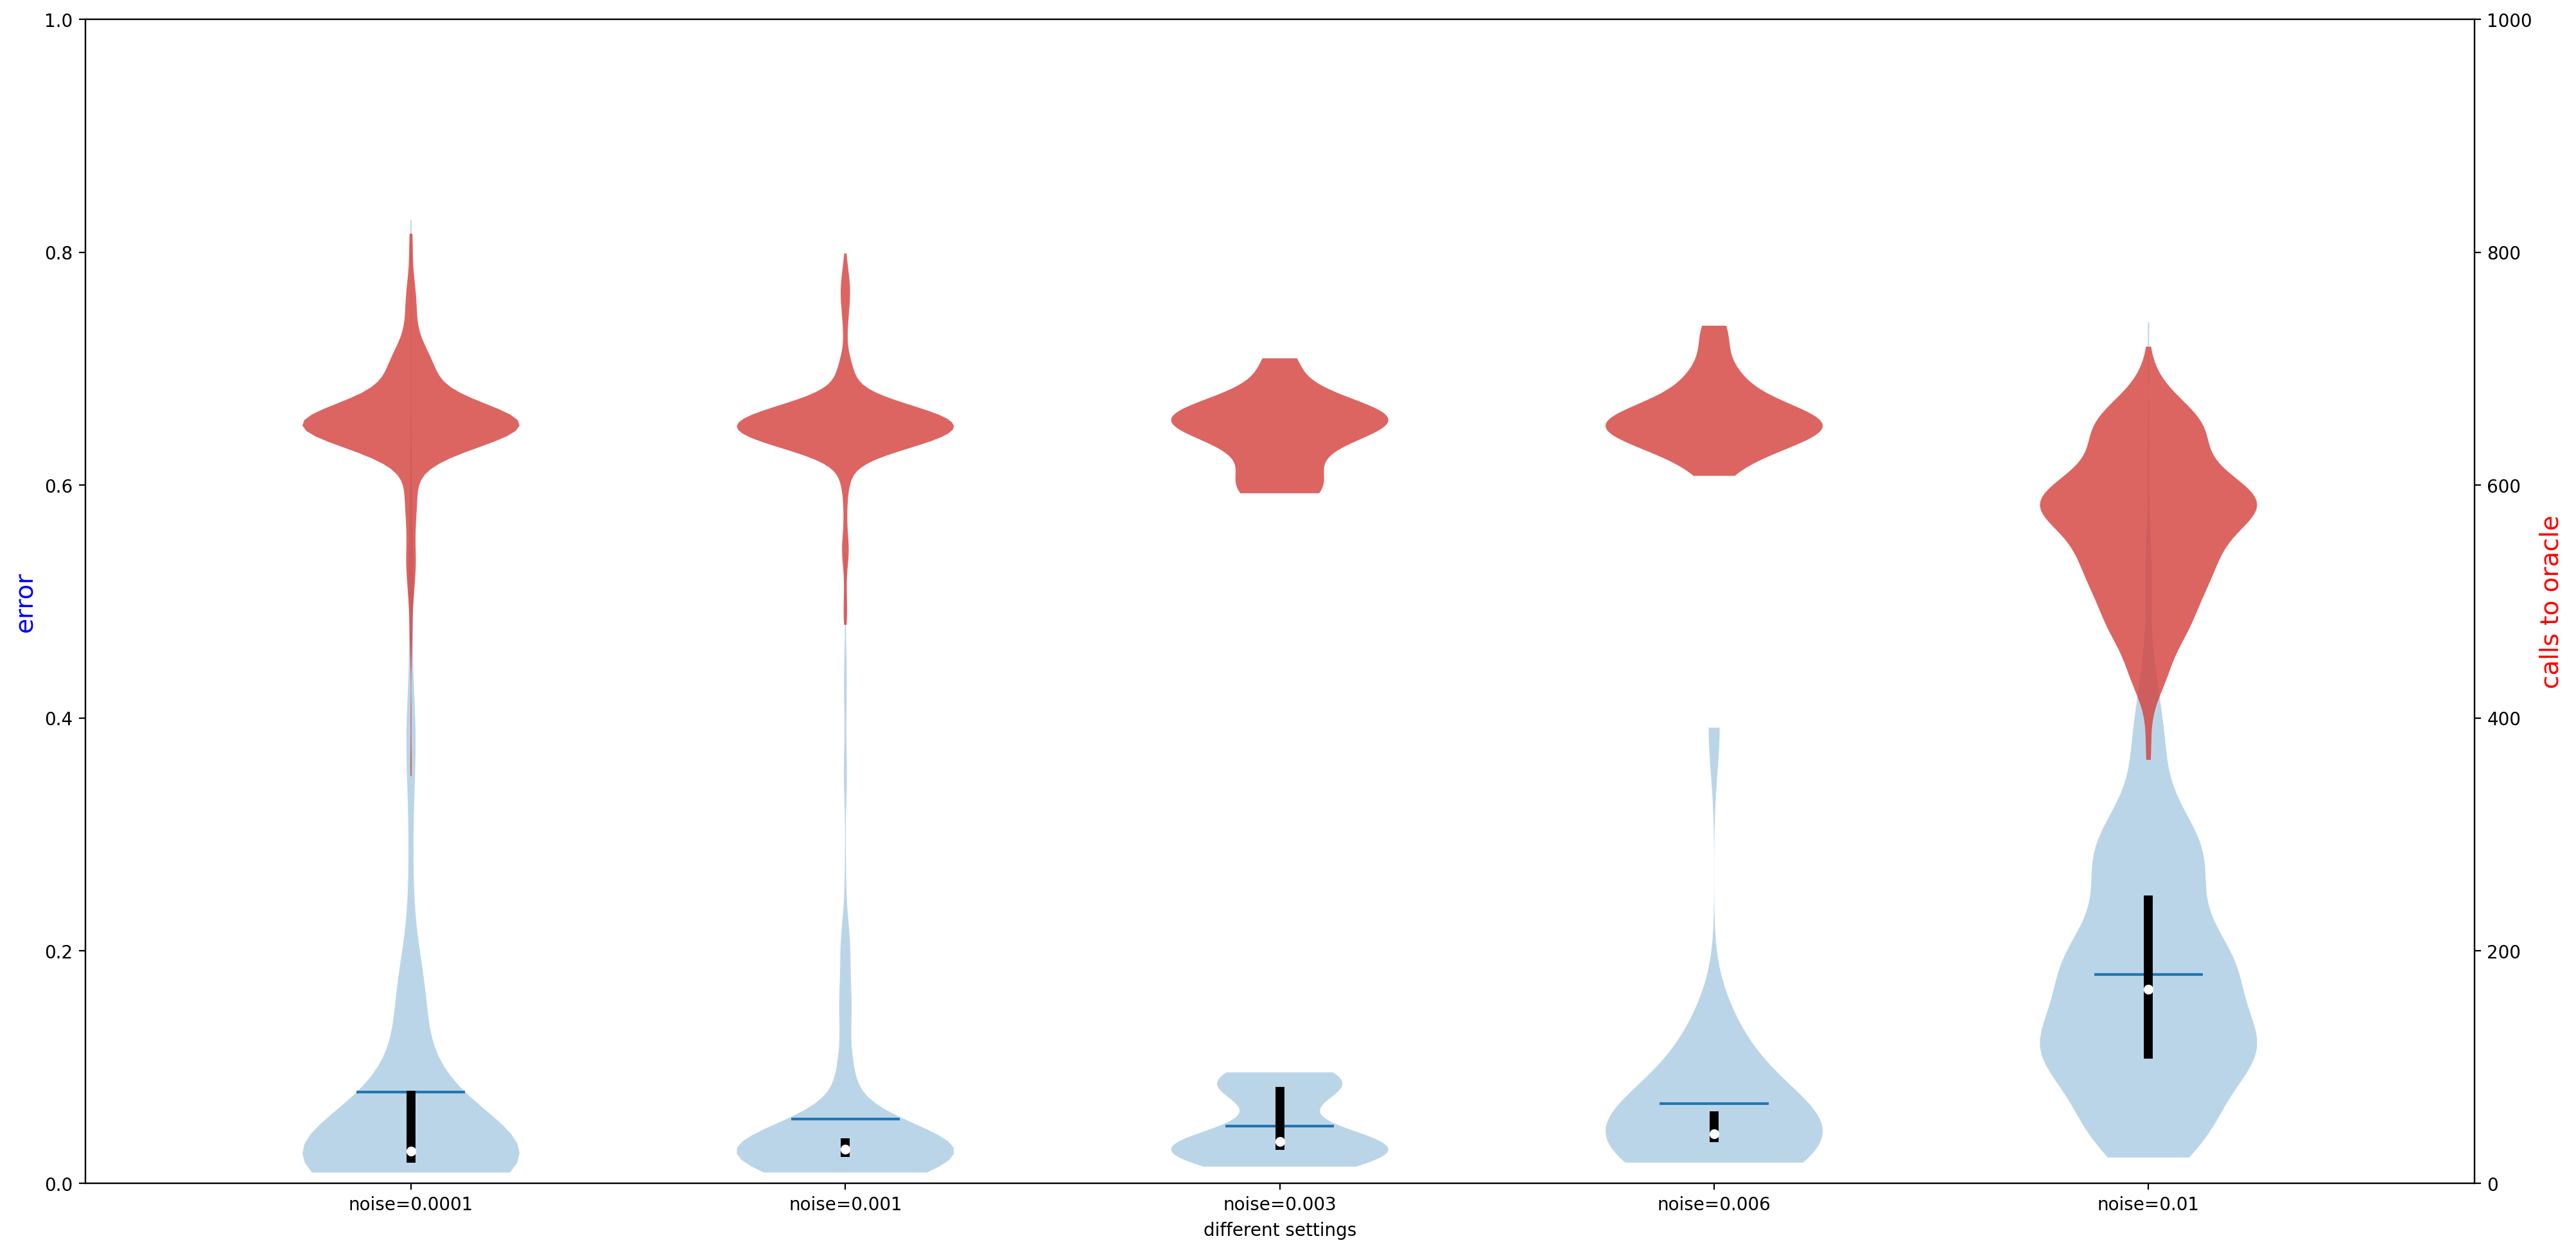

In [50]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(24, 12), sharey=True, dpi=200)
set_axis_style(ax1, titles)
quartile1, medians, quartile3= [], [], []
for e in errors:
    q1, m, q3 = np.percentile(e, [25, 50, 75], axis=0)
#     print(q1, m, q3)
    quartile1.append(q1)
    medians.append(m)
    quartile3.append(q3)

# print(quartile1, quartile3, medians)
ax1.violinplot(errors, showmeans=True, showmedians=False,
        showextrema=False)
inds = np.arange(1, len(medians) + 1)
ax1.set_ylabel("error", color="blue", size=14)
ax1.scatter(inds, medians, marker='o', color='white', s=20, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)

ax2 = ax1.twinx()
ax2.set_ylabel("calls to oracle", color="red",fontsize=14)
# ax2.scatter([1, 2], [1000, 1500], color="red")
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
parts = ax2.violinplot(calls, showmeans=False, showmedians=False,
        showextrema=False)
ax2.set_ylim([0, 1000])
ax1.set_ylim([0, 1.0])
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
#     pc.set_edgecolor('black')
    pc.set_alpha(0.8)
plt.savefig("RandomIsing_n=4_varNoise_violin.svg", format="svg")
plt.show()

### without randomness

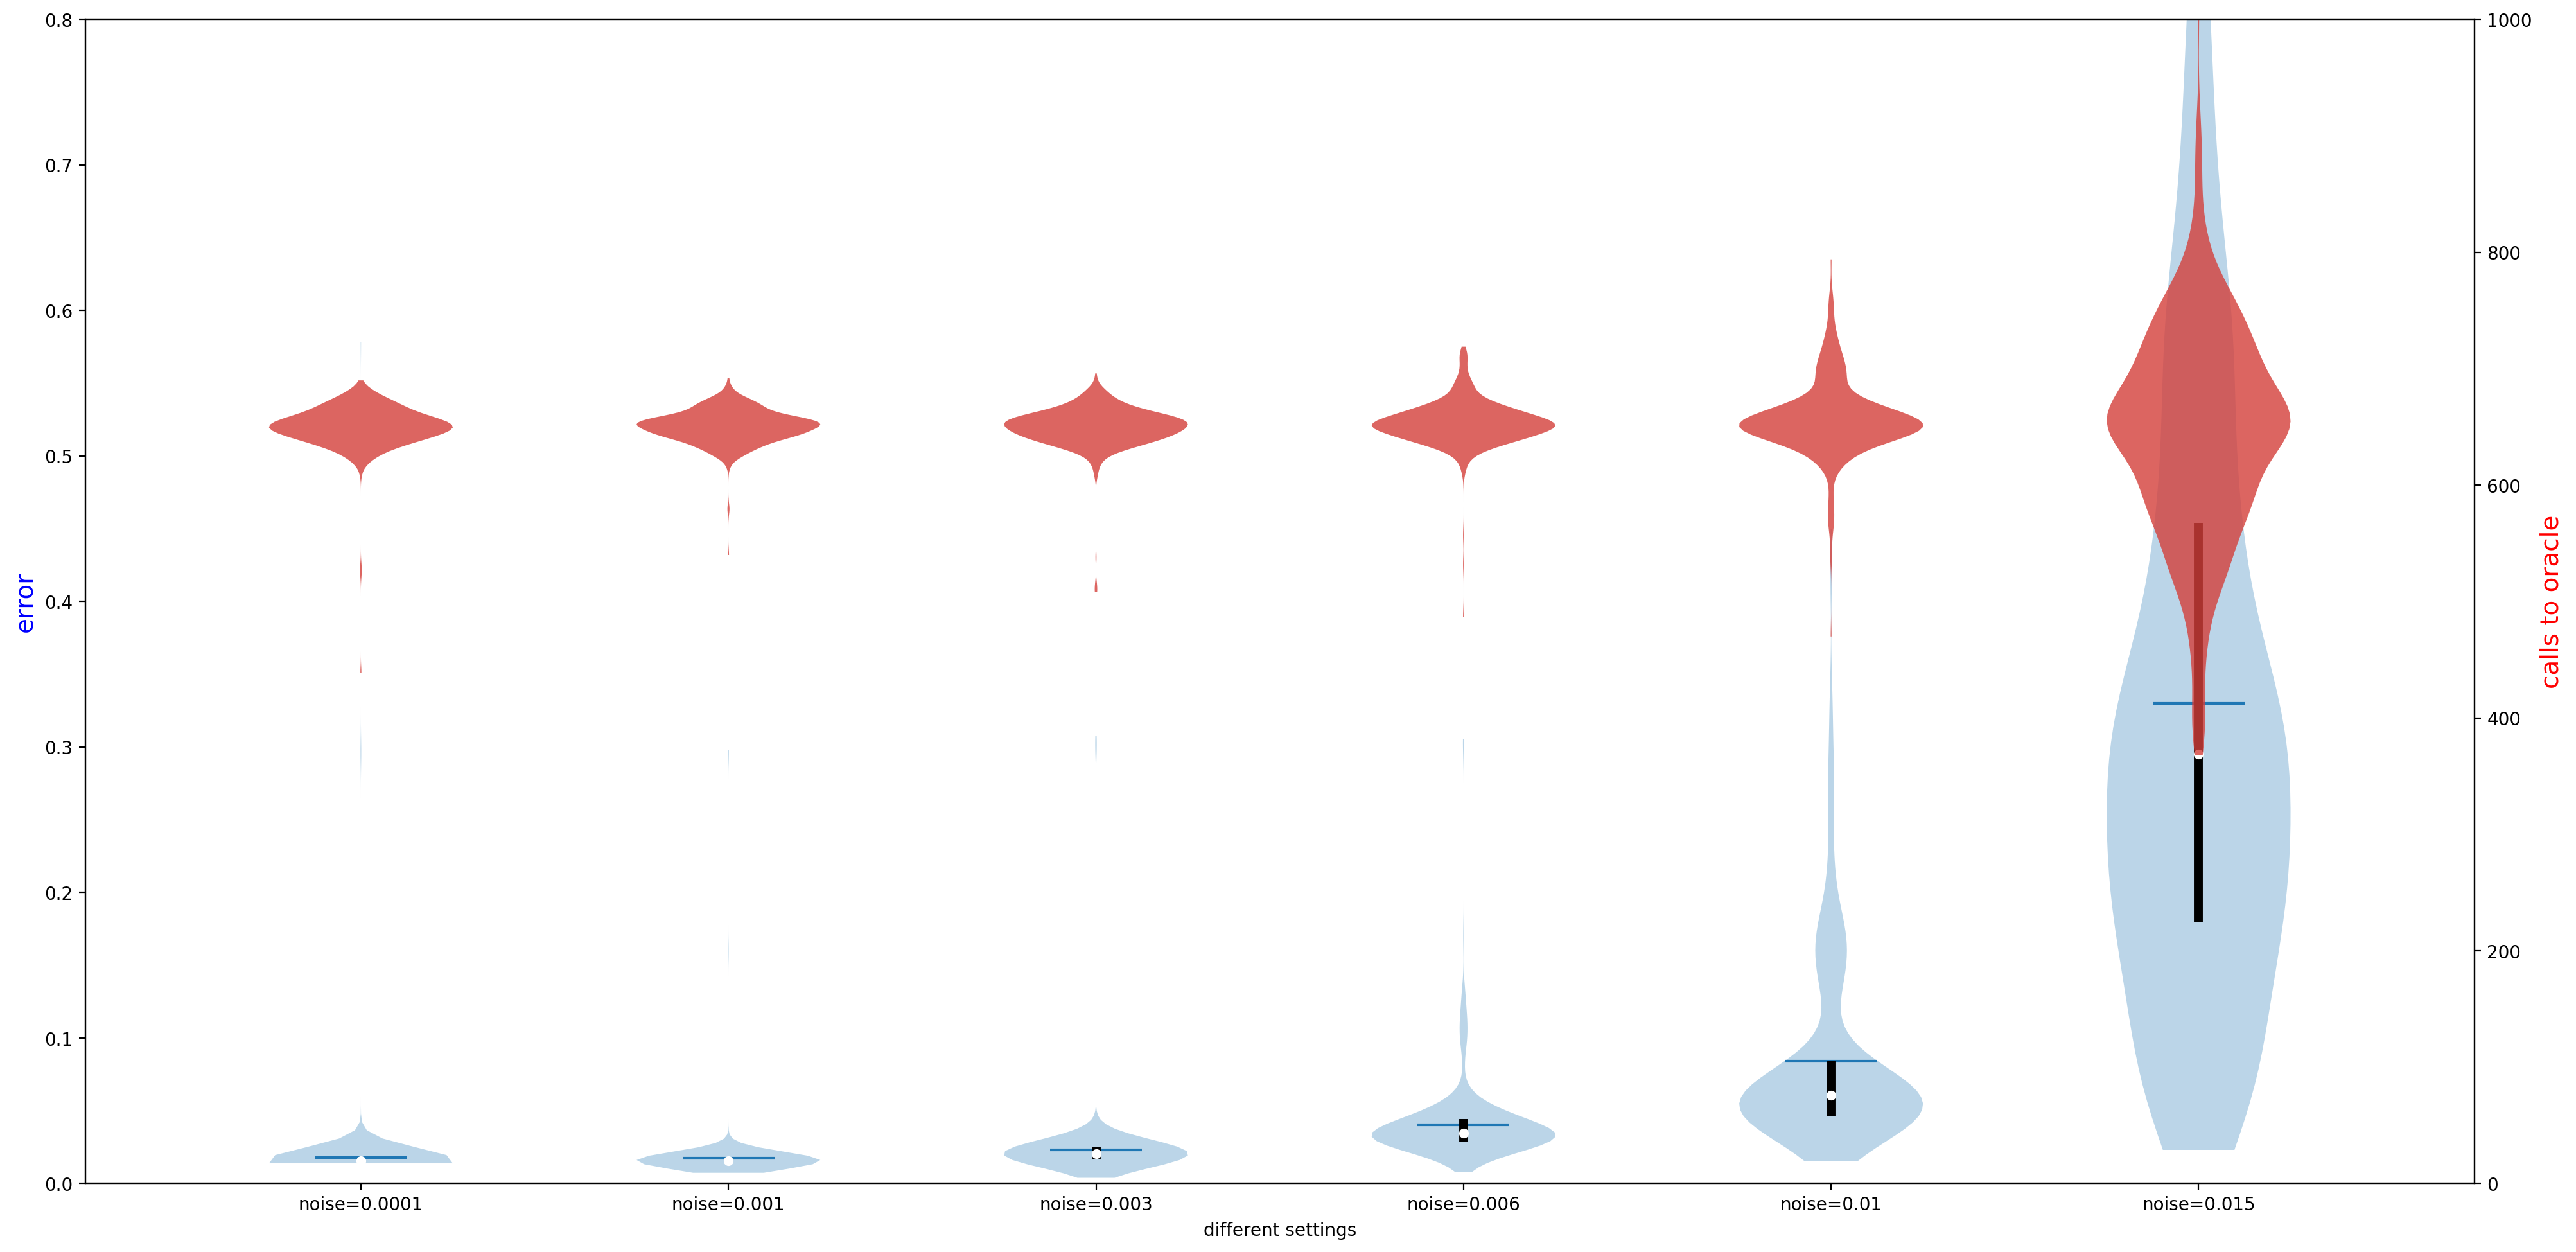

In [10]:
noiseLevels = ["0.0001",
               "0.001",
               "0.003",
               "0.006",
               "0.01",
               "0.015",
              ]

filenames = ["../data/strictlyIsing/IsingRounds=500_noise=" + x + ".json" for x in noiseLevels]
titles = [ "noise=" + x for x in noiseLevels]

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(e)
    calls.append(c)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(24, 12), sharey=True, dpi=200)
set_axis_style(ax1, titles)
quartile1, medians, quartile3= [], [], []
for e in errors:
    q1, m, q3 = np.percentile(e, [25, 50, 75], axis=0)
#     print(q1, m, q3)
    quartile1.append(q1)
    medians.append(m)
    quartile3.append(q3)

# print(quartile1, quartile3, medians)
ax1.violinplot(errors, showmeans=True, showmedians=False,
        showextrema=False)
inds = np.arange(1, len(medians) + 1)
ax1.set_ylabel("error", color="blue", size=14)
ax1.scatter(inds, medians, marker='o', color='white', s=20, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)

ax2 = ax1.twinx()
ax2.set_ylabel("calls to oracle", color="red",fontsize=14)
# ax2.scatter([1, 2], [1000, 1500], color="red")
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
parts = ax2.violinplot(calls, showmeans=False, showmedians=False,
        showextrema=False)
ax2.set_ylim([0, 1000])
ax1.set_ylim([0, 0.8])
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
#     pc.set_edgecolor('black')
    pc.set_alpha(0.8)
plt.savefig("Ising_n=4_varNoise_violin.svg", format="svg")
plt.show()

### Random Ising, various b

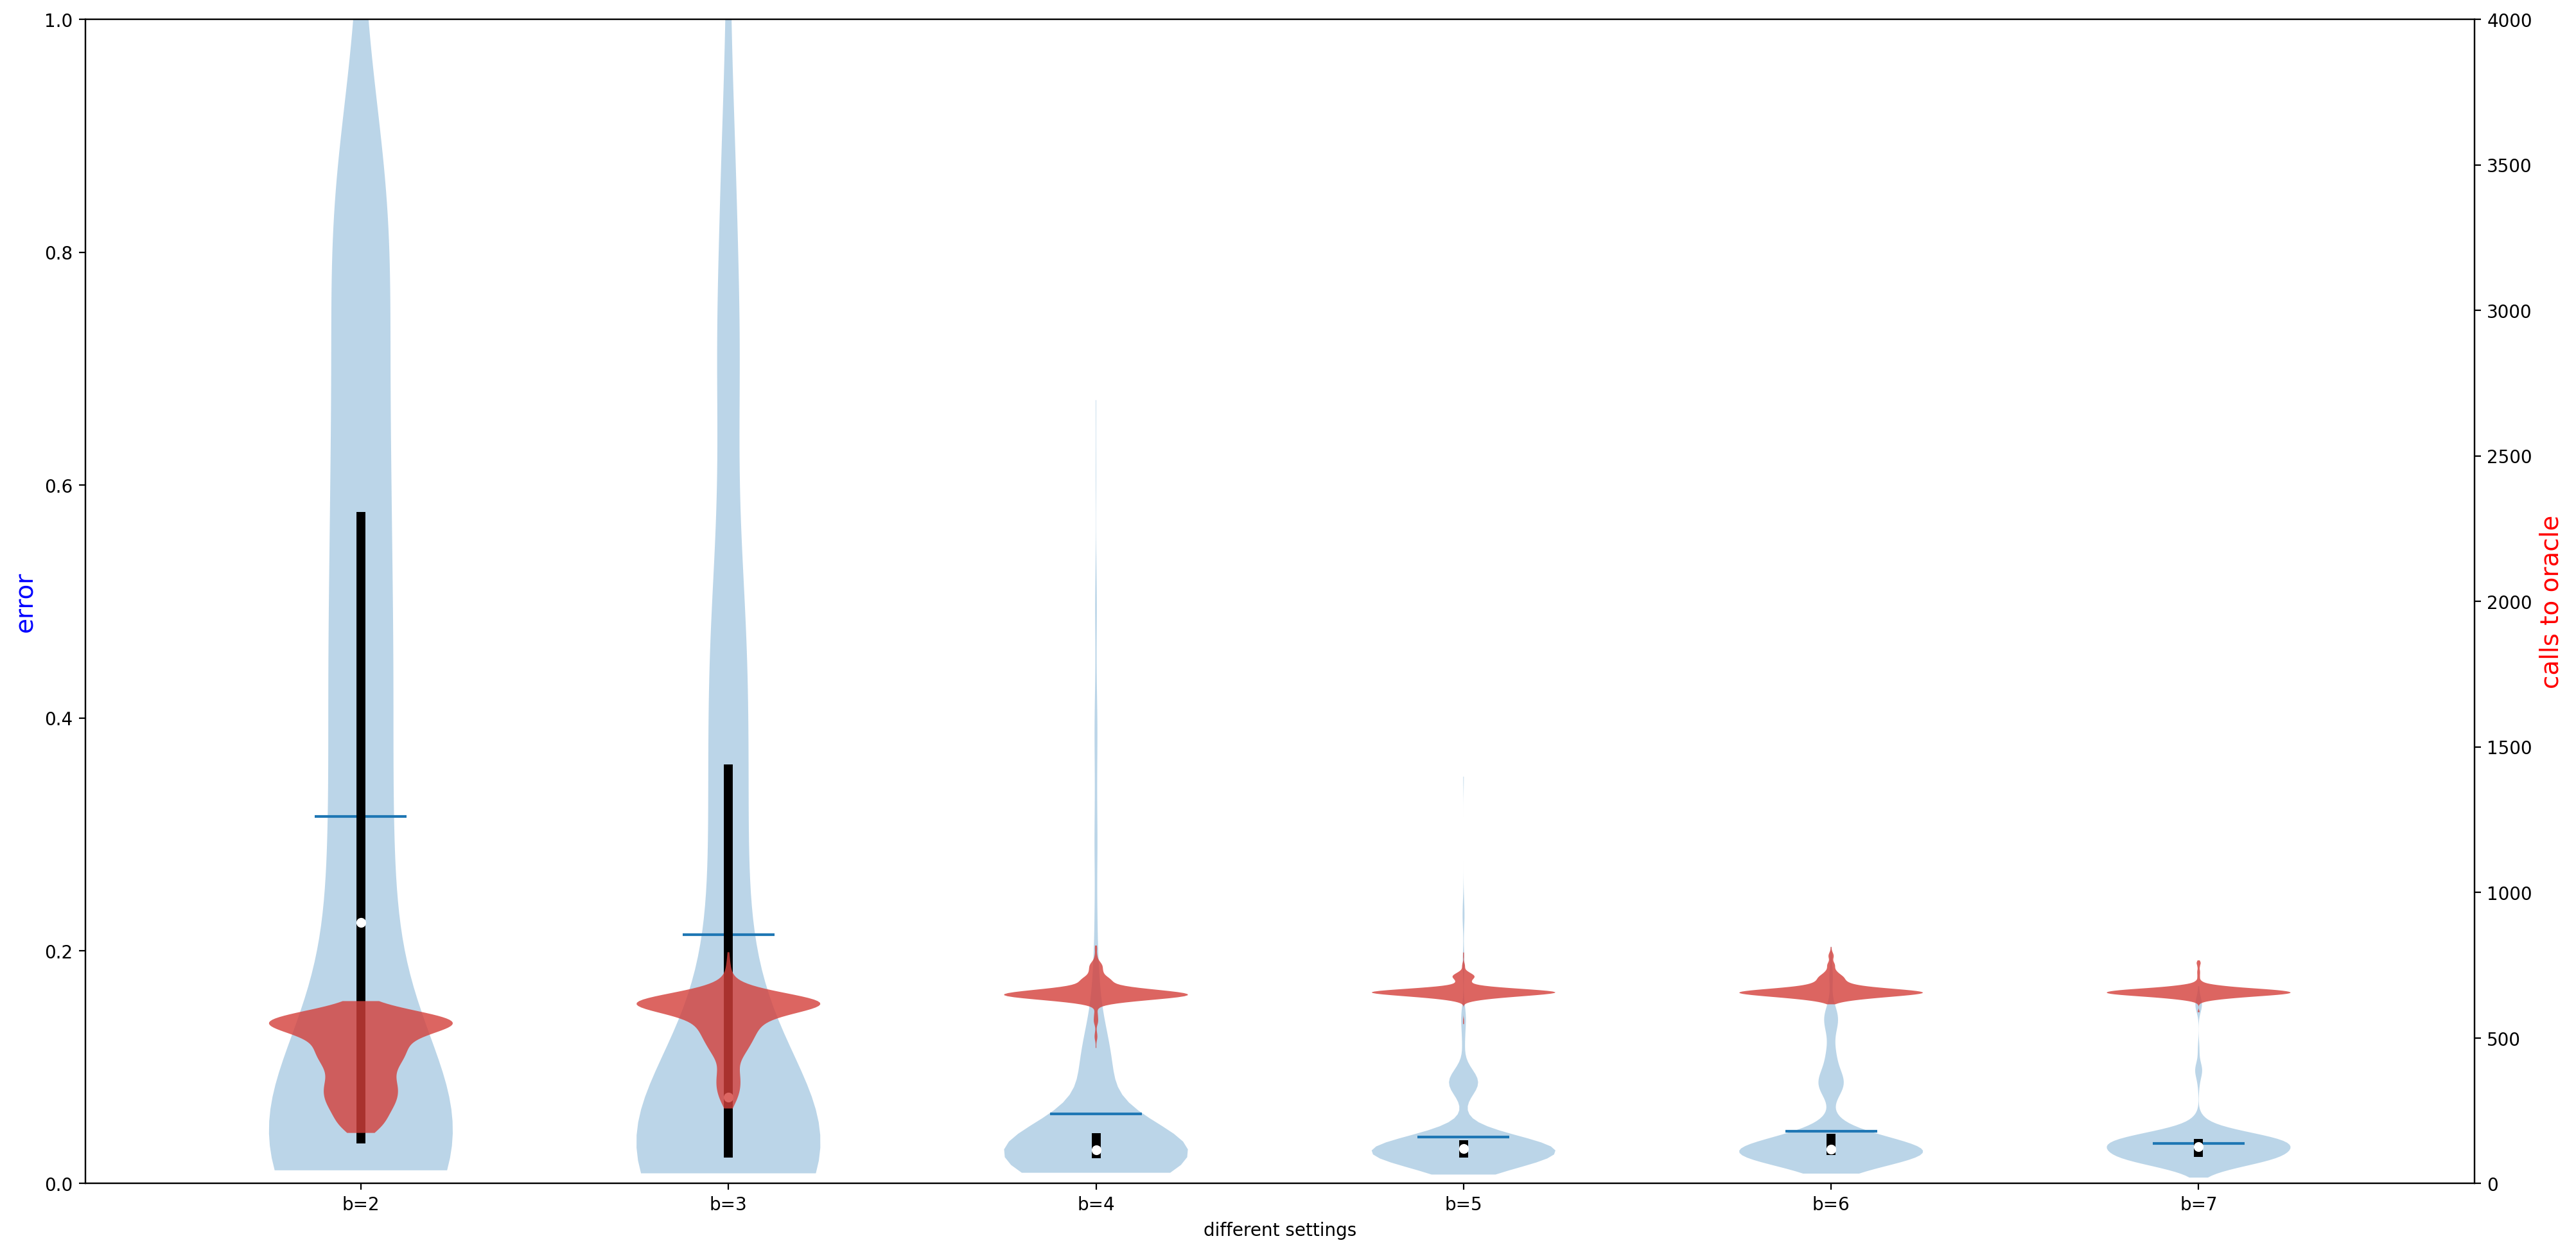

In [21]:
noiseLevels = ["2",
               "3",
               "4",
               "5",
               "6",
               "7"
              ]

filenames = ["../data/strictlyRandomIsingRounds=500_b=" + x + ".json" for x in noiseLevels]
titles = [ "b=" + x for x in noiseLevels]

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(e)
    calls.append(c)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(24, 12), sharey=True, dpi=200)
set_axis_style(ax1, titles)
quartile1, medians, quartile3= [], [], []
for e in errors:
    q1, m, q3 = np.percentile(e, [25, 50, 75], axis=0)
#     print(q1, m, q3)
    quartile1.append(q1)
    medians.append(m)
    quartile3.append(q3)

# print(quartile1, quartile3, medians)
ax1.violinplot(errors, showmeans=True, showmedians=False,
        showextrema=False)
inds = np.arange(1, len(medians) + 1)
ax1.set_ylabel("error", color="blue", size=14)
ax1.scatter(inds, medians, marker='o', color='white', s=20, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)

ax2 = ax1.twinx()
ax2.set_ylabel("calls to oracle", color="red",fontsize=14)
# ax2.scatter([1, 2], [1000, 1500], color="red")
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
parts = ax2.violinplot(calls, showmeans=False, showmedians=False,
        showextrema=False)
ax2.set_ylim([0, 4000])
ax1.set_ylim([0, 1])
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
#     pc.set_edgecolor('black')
    pc.set_alpha(0.8)
plt.savefig("Ising_n=4_varb_violin.svg", format="svg")
plt.show()

## Chemical Hamiltonian

In [48]:
# read from text file
filename = "./LiH_6.txt"

d = {}
with open(filename, "r") as f:
    count = 0
    lines = f.readlines()
    for s in lines:
        ns = s[:-1].split(' ')
        ns = [i for i in ns if i != '']
        indx = 0
        for i in range(1, len(ns)):
            indx = indx * 4
            indx += int(ns[i])
        d[indx] = float(ns[0])

new_d = {x+1: d[x]*10 for x in d}
print("Dict(")
for x in new_d:
    print("\t", x, " => ", new_d[x], ",")
print(")")

Dict(
	 1  =>  -2.7104083700726536 ,
	 3073  =>  -1.745198975210092 ,
	 769  =>  -1.2726305026333158 ,
	 3841  =>  0.5647364031520397 ,
	 193  =>  -0.12777587071339788 ,
	 3265  =>  0.484399127629246 ,
	 961  =>  0.41584938456426535 ,
	 49  =>  -1.745198975210092 ,
	 3121  =>  0.7823637778985213 ,
	 817  =>  0.6659936243343323 ,
	 241  =>  0.5389855881574944 ,
	 13  =>  -1.272630502633316 ,
	 3085  =>  0.6659936243343323 ,
	 781  =>  0.7400280578673019 ,
	 205  =>  0.5684250585068191 ,
	 61  =>  0.5647364031520397 ,
	 4  =>  -0.12777587071339735 ,
	 3076  =>  0.5389855881574944 ,
	 772  =>  0.5684250585068191 ,
	 196  =>  1.0024488587320461 ,
	 52  =>  0.484399127629246 ,
	 16  =>  0.41584938456426535 ,
	 321  =>  0.3806607628552998 ,
	 3393  =>  -0.029793806500249334 ,
	 641  =>  0.3806607628552998 ,
	 3713  =>  -0.029793806500249334 ,
	 369  =>  -0.09039934735000948 ,
	 689  =>  -0.09039934735000948 ,
	 333  =>  -0.036634285428473336 ,
	 653  =>  -0.036634285428473336 ,
	 324  =>  0.

### bar plot

In [121]:
def num2PauliLabel(x, n):
    label_map = {0: 'I', 1: 'X', 2: 'Z', 3: 'Y'}
    outstr = ""
    for i in range(n):
        outstr += label_map[x%4]
        x = x // 4
    return outstr

In [122]:
noiseLevels = [
               "4",
               "5"
              ]

filenames = ["../data/LiH4Rounds=500_b=" + x + ".json" for x in noiseLevels]
titles = [ "b=" + x for x in noiseLevels]

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(e)
    calls.append(c)

In [123]:
# load data from output json
originalHam, reconstructedHam = 0, 0
with open(filenames[0]) as f:
    data = json.load(f)
    originalHam = data[0]
    reconstructedHam = data[6][0]

In [124]:
getReVal = lambda x: reconstructedHam[x] if x in reconstructedHam else 0
result = {k: (v1, getReVal(k)) for k, v1 in sorted(originalHam.items(), key=lambda item: abs(item[1]), reverse=True)}

In [125]:
topNum = 25
labels = []
v0 = []
v1 = []
for k, v in list(result.items())[:topNum]:
    labels.append(k)
    v0.append(v[0])
    v1.append(v[1])

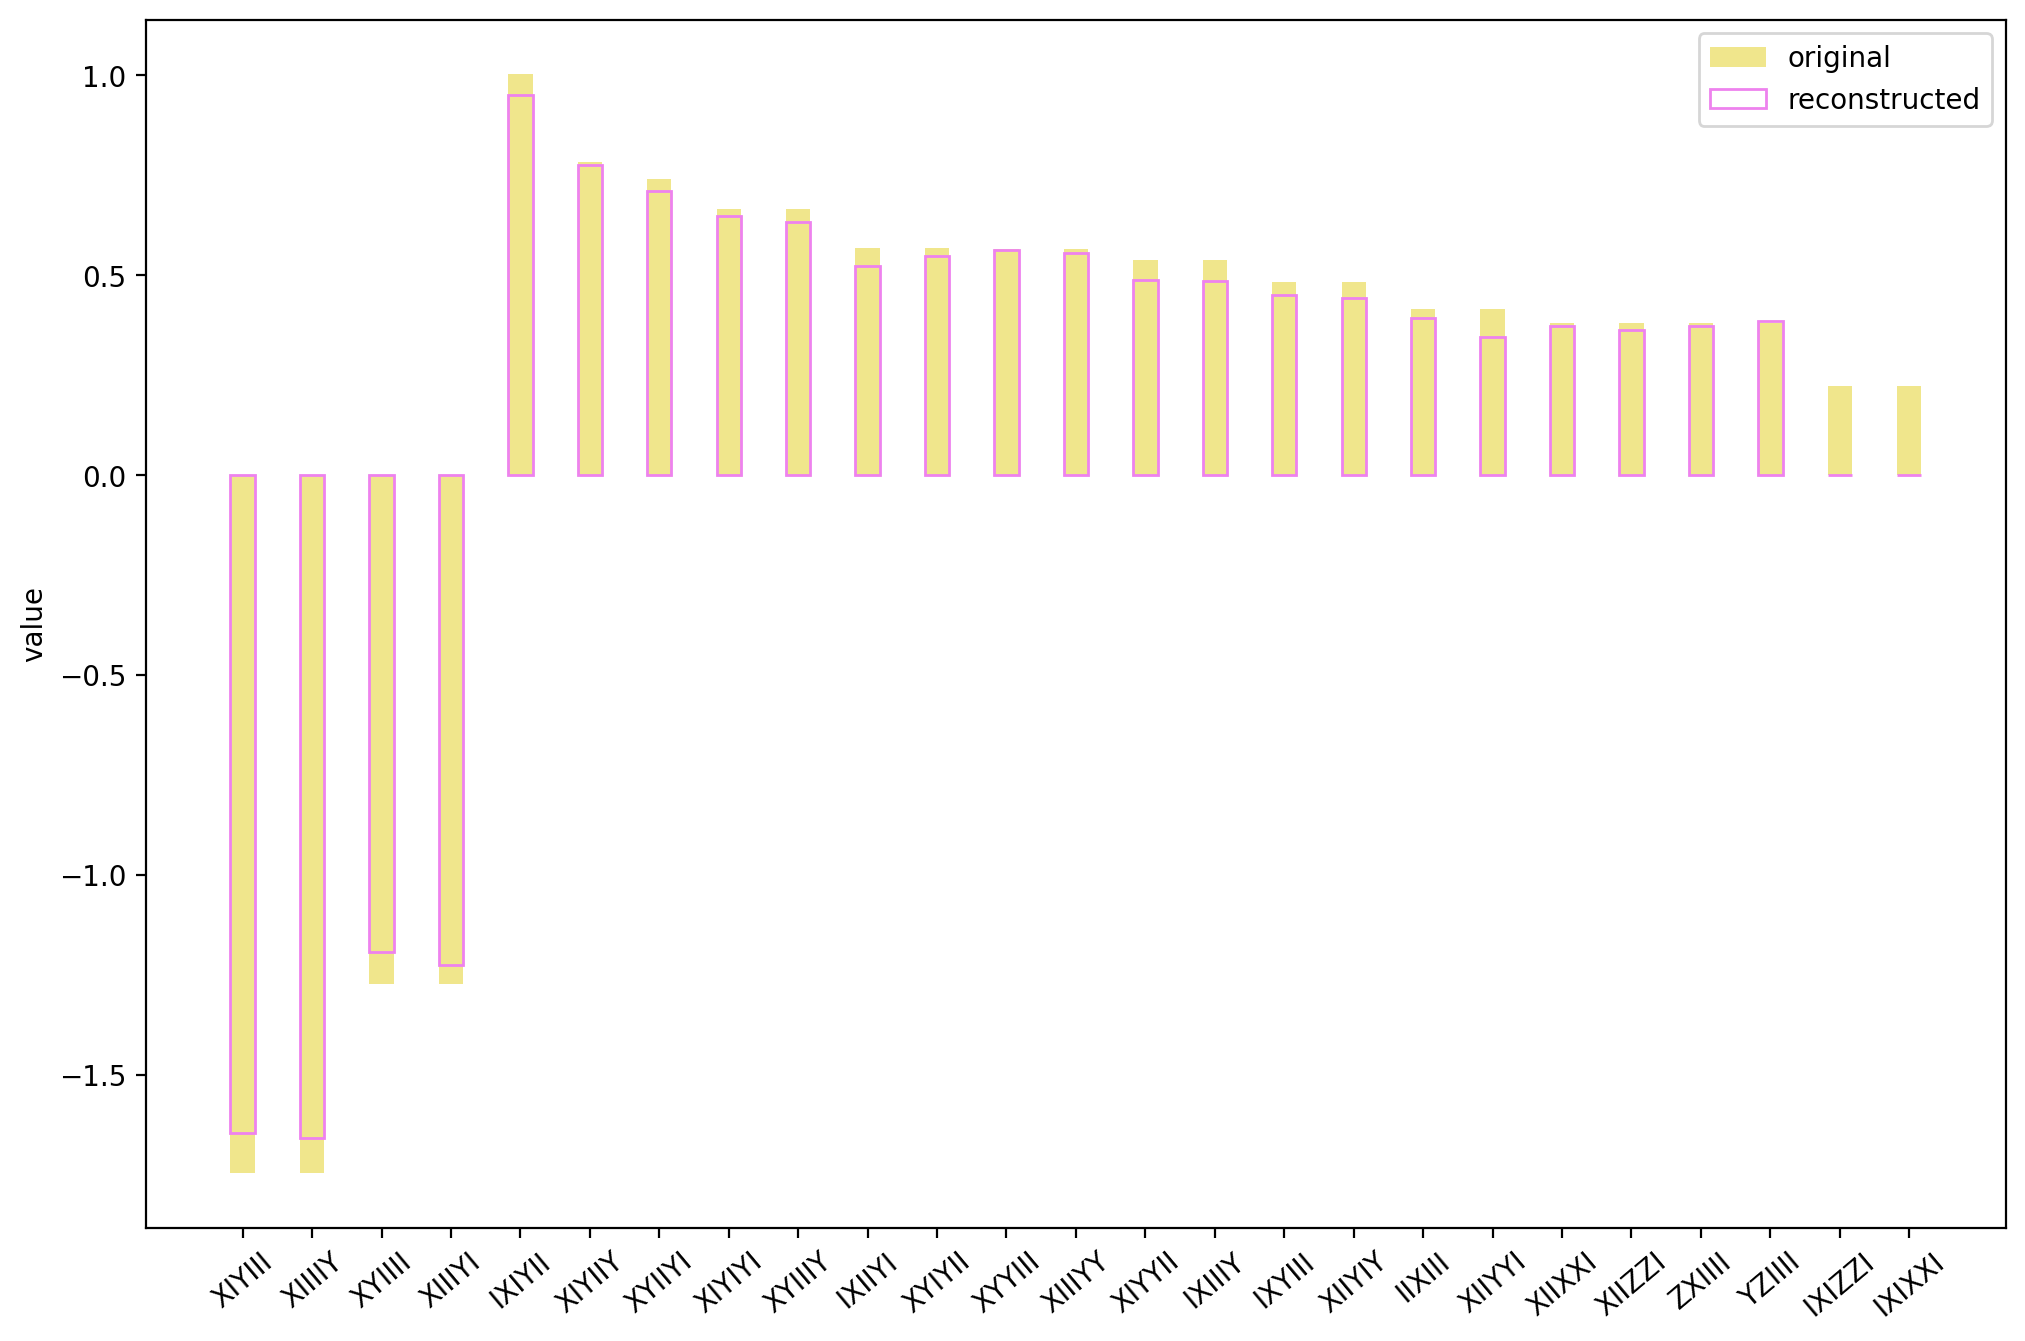

In [126]:
x = np.arange(len(labels))
width=0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x, v0, width, label='original', color='khaki')
rects2 = ax.bar(x, v1, width, label='reconstructed', edgecolor='violet', fill=False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.tick_params(axis='x', rotation=40)
ax.set_xticklabels([num2PauliLabel(int(i), 6) for i in labels])
ax.legend()

plt.savefig("LiH4_top_20_terms_barplot.svg", format="svg")
plt.show()

### chemical Hamiltonian, error rate

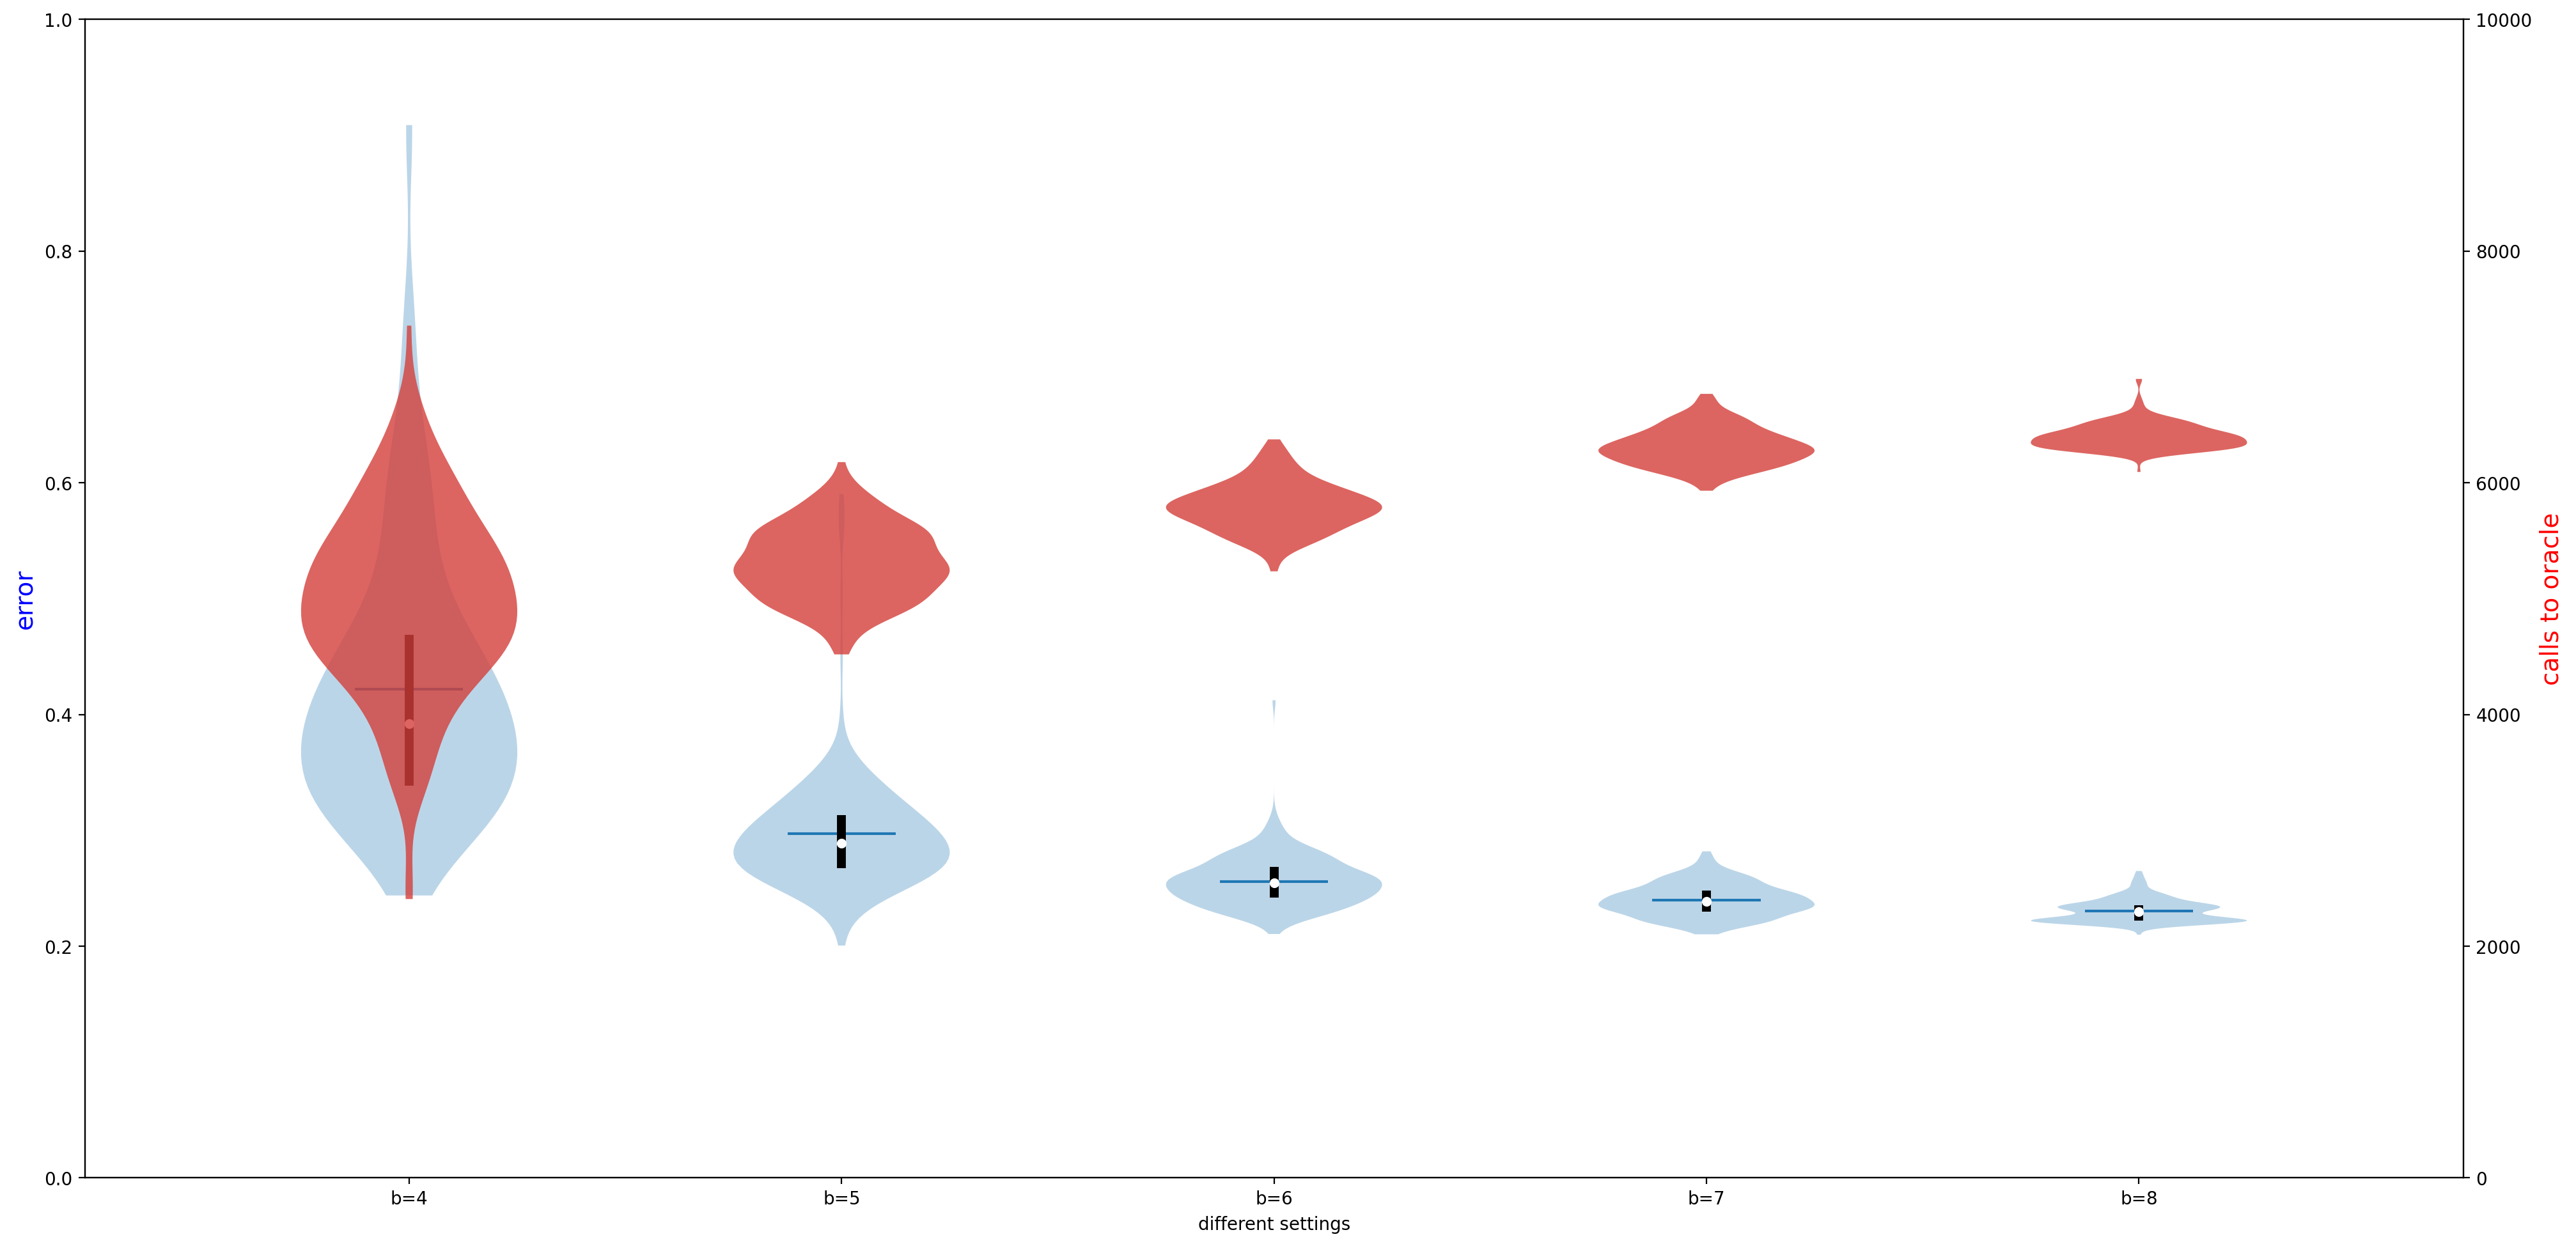

In [128]:
noiseLevels = [
               "4",
               "5",
               "6",
               "7",
               "8"
              ]

filenames = ["../data/LiH4Rounds=500_b=" + x + ".json" for x in noiseLevels]
titles = [ "b=" + x for x in noiseLevels]

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(e)
    calls.append(c)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(24, 12), sharey=True, dpi=200)
set_axis_style(ax1, titles)
quartile1, medians, quartile3= [], [], []
for e in errors:
    q1, m, q3 = np.percentile(e, [25, 50, 75], axis=0)
#     print(q1, m, q3)
    quartile1.append(q1)
    medians.append(m)
    quartile3.append(q3)

# print(quartile1, quartile3, medians)
ax1.violinplot(errors, showmeans=True, showmedians=False,
        showextrema=False)
inds = np.arange(1, len(medians) + 1)
ax1.set_ylabel("error", color="blue", size=14)
ax1.scatter(inds, medians, marker='o', color='white', s=20, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)

ax2 = ax1.twinx()
ax2.set_ylabel("calls to oracle", color="red",fontsize=14)
# ax2.scatter([1, 2], [1000, 1500], color="red")
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
parts = ax2.violinplot(calls, showmeans=False, showmedians=False,
        showextrema=False)
ax2.set_ylim([0, 10000])
ax1.set_ylim([0, 1])
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
#     pc.set_edgecolor('black')
    pc.set_alpha(0.8)
plt.savefig("Ising_LiH4_n=6_varb_violin.svg", format="svg")
plt.show()